<a href="https://colab.research.google.com/github/ShubhGupta2004/mlLearning/blob/main/Copy_of_support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [26]:
dataset = pd.read_csv('Position_Salaries.csv')
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values


In [27]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [28]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [29]:
y=y.reshape(len(y),1)

In [30]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

scX = StandardScaler()
x=scX.fit_transform(x)

scY = StandardScaler()
y =scY.fit_transform(y)

In [35]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [36]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [37]:
from sklearn.svm import SVR
svrReg = SVR(kernel='rbf')
svrReg.fit(x,y)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [41]:
scY.inverse_transform(svrReg.predict(scX.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

## Visualising the SVR results

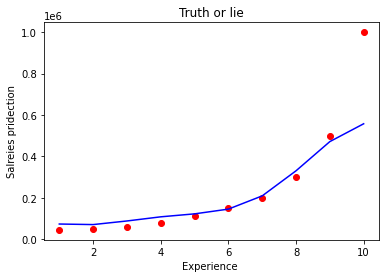

In [46]:
plt.scatter(scX.inverse_transform(x),scY.inverse_transform(y),color='red')
plt.plot(scX.inverse_transform(x),scY.inverse_transform(svrReg.predict(x).reshape(-1,1)),'blue')
plt.title('Truth or lie')
plt.xlabel('Experience ')
plt.ylabel('Salreies pridection')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

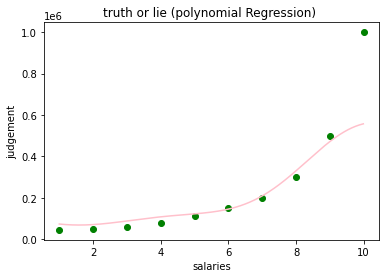

In [48]:
xGrid = np.arange(min(scX.inverse_transform(x)),max(scX.inverse_transform(x)),0.01)
xGrid = xGrid.reshape(len(xGrid),1)

plt.scatter(scX.inverse_transform(x),scY.inverse_transform(y),color='green')
plt.plot(xGrid,scY.inverse_transform(svrReg.predict(scX.transform(xGrid)).reshape(-1,1)),color='pink')
plt.title('truth or lie (polynomial Regression) ')
plt.xlabel('salaries')
plt.ylabel('judgement')
plt.show()